# 1 First Assignment

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from main import *

## 1.1 Optimisation without constraints

#### 1.1.1 Gradient methods

Given the implementation of the gradient descent algorithm with a constant stepsize, we try to study its convergence with different step sizes

In [3]:
rhos = [0.1, 0.05, 0.01, 0.001]
for rho in rhos :
    results = gradient_rho_constant(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    print('for '+ str(rho) +', did the algorithm converge? ', results['converged'])

/home/otmane/Desktop/3A/centrale/opt/tp/main.py:57: RuntimeWarning: invalid value encountered in subtract
  xnp1=xn-rho*dfx # nouveau point courant (x_{n+1})


for 0.1, did the algorithm converge?  False
for 0.05, did the algorithm converge?  False
for 0.01, did the algorithm converge?  True
for 0.001, did the algorithm converge?  True


We can see that for high values of rho, the algorithm does not converge, it even results on invalid values for the update rule ( xnp1 = inf ). So we either reduce the stepsize parameter or define an adaptative algorithm that can handle this issue.

 **We define an adaptative version of the gradient descend algorithm** 

In [4]:
def gradient_rho_adaptatif(fun, fun_der, U0, rho, tol,args):
    
    # Fonction permettant de minimiser la fonction f(U) par rapport au vecteur U 
    # Méthode : gradient à pas fixe
    # INPUTS :
    # - han_f   : handle vers la fonction à minimiser
    # - han_df  : handle vers le gradient de la fonction à minimiser
    # - U0      : vecteur initial 
    # - rho     : paramètre gérant l'amplitude des déplacement 
    # - tol     : tolérance pour définir le critère d'arrêt
    # OUTPUT : 
    # - GradResults : structure décrivant la solution


    itermax=10000  # nombre maximal d'itérations 
    xn=U0
    f=fun(xn,*args) # point initial de l'algorithme
    it=0         # compteur pour les itérations
    converged = False;
    
    while (~converged & (it < itermax)):
        it=it+1
        dfx=fun_der(xn,*args)# valeur courante de la fonction à minimiser
        
        xnp1=xn-rho*dfx
        fnp1 = fun(xnp1,*args)
        
        if fnp1 < f :
            
            if abs(fnp1-f)<tol:
                converged = True
                
            xn, f = xnp1, fnp1
            rho *= 2
        else :
            rho /= 2

    GradResults = {
            'initial_x':U0,
            'minimum':xnp1,
            'f_minimum':fnp1,
            'iterations':it,
            'converged':converged
            }
    return GradResults

First, let's see if both versions give us the same minimum or not

In [5]:
res_gd_const = gradient_rho_constant(f1,df1,x0,rho=0.01,tol=1e-6,args=(B,S)) 
res_gd_adaptative = gradient_rho_adaptatif(f1,df1,x0,rho=0.01,tol=1e-6,args=(B,S)) 
print('the minimum value we reach with a constant stepsize:', res_gd_const['f_minimum'])
print('the minimum value we reach with an adaptative stepsize:', res_gd_adaptative['f_minimum'])

the minimum value we reach with a constant stepsize: -1.8368912354010196
the minimum value we reach with an adaptative stepsize: -1.817778210582762


We can see that for the same stepsize, the simple version reaches a better minima.

Let's see if the adaptative version can deal with the convergence issue discussed above.

In [6]:
rhos = [1, 0.1, 0.05, 0.01, 0.001]
for rho in rhos :
    results = gradient_rho_adaptatif(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    print('for '+ str(rho) +', did the algorithme converge? ', results['converged'])

for 1, did the algorithme converge?  True
for 0.1, did the algorithme converge?  True
for 0.05, did the algorithme converge?  True
for 0.01, did the algorithme converge?  True
for 0.001, did the algorithme converge?  True


**Indeed, it can converge for any stepsize we choose.**

Another great benefit of using the adaptative version is the **speed of convergence**. We can further compare both algorithms by ploting the number of iterations required for the convergence of both versions depending of the stepsize we pick. For instance, we take values for which both algorithms can converge.

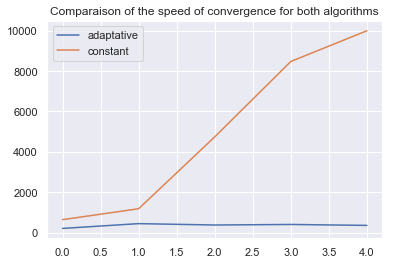

In [7]:
rhos = [0.01, 0.005, 0.001, 0.0005, 0.0001]
adaptative = [gradient_rho_adaptatif(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))['iterations'] for rho in rhos]
constant = [gradient_rho_constant(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))['iterations'] for rho in rhos]

plt.plot(adaptative, label= 'adaptative')
plt.plot(constant, label = 'constant')
plt.title('Comparaison of the speed of convergence for both algorithms')
plt.legend()
plt.show()

The two algorithms make one call of the objective function in an iteration, and perform basic arithmetic operations inside the iterations loop. The complexity of such algorithms is **O(n)** with n the number of iterations. All the comparaisons then boil down to one criterion which is the convergence speed.

As we know, the speed of convergence of the simple gradient descent is highly affected by the value of the stepsize we choose. The adaptative version however have a constant convergence speed and does not depend on the value of the stepsize. 

So if we want to conclude, we can say that in terms of convergence and speed, the adaptative version outperforms the constant one, but the simple gradient descent can give better minimas if we use a suitable stepsize.

#### 1.1.2 Quasi-Newton methods

Let's compare now the performance of the BFGS method with the algorithms we implemented above.

In [8]:
from scipy.optimize import minimize

In [9]:
bfgs_results = minimize(fun = f1, x0 = x0, args=(B,S), method='BFGS', tol=1e-6)
bfgs_results

      fun: -1.836962311965238
 hess_inv: array([[ 0.5004328 , -0.21223272,  0.05691395, -0.28056012,  0.50919827],
       [-0.21223272,  0.22383377,  0.0370393 ,  0.11542843, -0.34043246],
       [ 0.05691395,  0.0370393 ,  0.1247386 , -0.04905887, -0.09108766],
       [-0.28056012,  0.11542843, -0.04905887,  0.20504998, -0.28961765],
       [ 0.50919827, -0.34043246, -0.09108766, -0.28961765,  0.77691404]])
      jac: array([-2.98023224e-08, -8.94069672e-08,  1.49011612e-08, -1.49011612e-08,
        1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 91
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([-0.69603139,  0.15793134, -0.61407083,  0.49414155, -0.05345803])

The speed of the BFGS method is phenomenal, it did converge after **10** iterations and a gave us a slighly better minima than our gradient descent implementations.

#### Closed form of the minima

The objective function we have is a simple quadratic function, so an analytical solution can be easily found. It's Hessian matrix is **S** which is positive definite. 

In [10]:
np.linalg.eigvals(S)

array([45.48200751, 14.49627115,  0.34399006,  1.89569112,  7.21954015])

The eigenvalues of S are strictly positive, so our function is convex and an analytical solution of the minimum can be found by settinh the first derivative to zero.

In [11]:
S_1 = np.linalg.inv(S)
minimum = 0.5*S_1*B
f_minimum = f1(minimum, B, S)
print('the analytical minimum is :', f_minimum)

the analytical minimum is : -1.8369623119652505


To confirm the performances of the quasi-newton methods, we can check the relative absolute difference between the analytical minimum and the result of the BFGS method.

In [12]:
np.abs((f_minimum - bfgs_results['fun'])/f_minimum)

6.7690544301362755e-15

The solution of the BFGS method is hugely precise.

## 1.2 Optimisation under constraints

#### 1.2.1 Scipy method usage

For the following results, we're gonna try to find the minimum of our functions in $ U = [0, 1]^5$

we define the f2 function :

In [13]:
def f2(U,S):
    n=U.shape[0]
    U=np.matrix(U)
    U.shape=(n,1)
    fU = np.transpose(U) * S * U + np.transpose(U) * np.exp(U);
    return float(fU)

We use the **Sequential Quadratic Programming** method to minimise both functions $f_1$ and $f_2$.

In [14]:
sqp_f1 = minimize(fun = f1, x0 = x0, args=(B,S), method='SLSQP', bounds=[(0,1)]*5, tol=1e-6)
sqp_f2 = minimize(fun = f2, x0 = x0, args=(S), method='SLSQP', bounds=[(0,1)]*5, tol=1e-6)

In [15]:
print('the argmins and minimums for both function are: \n')
print('f1: argmin =', np.round(sqp_f1['x'], 5), 'f_min =', np.round(sqp_f1['fun'], 5), '\n')
print('f2: argmin =', np.round(sqp_f2['x'], 5), 'f_min =', np.round(sqp_f2['fun'], 5), '\n')

the argmins and minimums for both function are: 

f1: argmin = [0.      0.12698 0.      0.01945 0.     ] f_min = -0.13853 

f2: argmin = [0. 0. 0. 0. 0.] f_min = 0.0 



Both solutions respect the boundaries (constraints).

#### 1.2.2 Optimisation under constraints and penalisation

We define a simple and classical penalisation function that is $C^{\infty}$

In [16]:
Beta = lambda u : np.sum(np.maximum(u-1, 0)**2 + (np.maximum(-u,0))**2)
print('Penalisation for x0:', Beta(x0))
print('Penalisation for x0 + 2:', Beta(x0 + 1))
print('Penalisation for x0 - 1:', Beta(x0 - 2))

Penalisation for x0: 0.0
Penalisation for x0 + 2: 5.0
Penalisation for x0 - 1: 5.0


We define the penalisation method as follows :

In [17]:
epsilon = 1/2#The start values for epsilon
decay = 2 #The decay parameter for epsilon in each iteration
num_iter = 1000 #number of iterations
x_1, x_2 = x0, x0 # the starting point for both functions

for k in range(num_iter):
    f1_penal, f2_penal = lambda U : f1(U,B,S) + (1/epsilon)*Beta(U), lambda U : f2(U,S) + (1/epsilon)*Beta(U)
    x_1 = minimize(fun = f1_penal, x0 = x_1, method='BFGS', tol=1e-6)['x']
    x_2 = minimize(fun = f2_penal, x0 = x_2, method='BFGS', tol=1e-6)['x']
    epsilon /= decay

In [18]:
print('the argmins and minimums for both function are: \n')
print('f1: argmin =', np.round(x_1, 5), 'f_min =', np.round(f1(x_1,B,S), 5), '\n')
print('f2: argmin =', np.round(x_2, 5), 'f_min =', np.round(f2(x_2,S), 5), '\n')

the argmins and minimums for both function are: 

f1: argmin = [0.      0.12689 0.      0.01941 0.     ] f_min = -0.13853 

f2: argmin = [0. 0. 0. 0. 0.] f_min = 0.0 



We can see that both methods give close results.

#### 1.2.3 Dual methods for optimisation under constraints

For the Uzawa algorithm, we need to define the Lagragian function and it's derivative. We know that our constraints are affine functions so the dual gap is equal to zero. We can surely obtain the true minimum by applying this method.

In [19]:
# Lagrangian implementation 

def Lagragian1(U,p):
    low_bound, up_bound = -U, U-1
    return f1(U,B,S) + np.sum(p*np.concatenate([low_bound, up_bound], axis=0))
    

def dLagrangian1(U,p):
    low_bound, up_bound = -U, U-1
    return np.concatenate([low_bound, up_bound], axis=0)


**The Uzawa algorithm**

In [20]:
def uzawa(Lagrangian, dL, p0, x0, rho, iterations):
    p_max, x_min = p0, x0
    for i in range(iterations) : 
        x_min = minimize(fun = Lagrangian, x0 = x_min, args= (p_max), method='BFGS', tol=1e-6)['x']
        p_max = np.maximum(0 , p_max + (rho)*dL(x_min,p_max))
    return {'x_min': x_min, 'p_max': p_max, 'l_min': Lagragian1(x_min, p_max)}

In [21]:
p0 = np.zeros(10)
results = uzawa(Lagrangian=Lagragian1, dL=dLagrangian1 , p0=p0 , x0=x0, rho=1, iterations=1000)
x_min, l_min = results['x_min'], results['l_min']

In [22]:
print('Lagrangian: argmaxmin =', np.round(x_min, 5), 'l_min =', np.round(l_min, 5), '\n')

Lagrangian: argmaxmin = [-0.       0.12689 -0.       0.01941 -0.     ] l_min = -0.13853 



We can see that our claims are confirmed and there is no duality gap. the solution for the dual problem matches the first solutions we got

## 1.3 Non Convex Optimisation : Simulated Annealing

In this section, we're gonna tackle a non convex problem, and try the simulated annealing algorithm to deal with it.

 We define $f_3$ wich is clearly a non convex function.

In [23]:
def f3(U) : 
    return f1(U,B,S) + 10*np.sin(2*f1(U,B,S))

Let's try a convex optimisation algorithm on this function with different starting points.

In [24]:
rng = np.random.RandomState(1)
for i in range(10) : 
    x_init = rng.uniform(-1,1,5)
    print("for try {}/10 we get f_min: {}".format(i+1, np.round(minimize(fun = f3, x0 = x_init, method='BFGS', tol=1e-6)['fun'],5)))

for try 1/10 we get f_min: -10.7979
for try 2/10 we get f_min: -1.37312
for try 3/10 we get f_min: -1.37312
for try 4/10 we get f_min: 14.33484
for try 5/10 we get f_min: 4.91006
for try 6/10 we get f_min: 26.90121
for try 7/10 we get f_min: 55.17554
for try 8/10 we get f_min: -1.37312
for try 9/10 we get f_min: 36.32599
for try 10/10 we get f_min: 11.19325


Indeed, the algorithm converges to different local minimas but we can't confirm that the minimum of them all isn't a global minima. This can say that in the ***general case***, the algorithm converges to a local minima.

Let's try the simulated annealing which is more suitable to non convex  problems.

In scipy, the simulated annealing function is deprecated and they propose a better algorithm under the name of basinhopping

In [25]:
from scipy.optimize import basinhopping

In [26]:
rng = np.random.RandomState(1)
for i in range(5) : 
    x_init = rng.uniform(-1,1,5)
    results = basinhopping(f3, x0 )
    print("for try {}/5 we get f_min : {}".format(i+1,np.round(results['fun'],5)), 'argmin :', np.round(results['x'],5))

for try 1/5 we get f_min : -10.7979 argmin : [-0.34796  0.13986 -0.39632  0.0138   0.21415]
for try 2/5 we get f_min : -10.7979 argmin : [-0.82809  0.35733 -0.51449  0.32534 -0.4078 ]
for try 3/5 we get f_min : -10.7979 argmin : [-0.68152  0.63191 -0.35012  0.40778 -0.40565]
for try 4/5 we get f_min : -10.7979 argmin : [ 0.02791 -0.35294 -0.40117 -0.00412  0.62756]
for try 5/5 we get f_min : -10.7979 argmin : [ 0.19363 -0.3294  -0.61282 -0.07489  1.13471]


We can see that we always converge to the same minima, which is the ***best minima*** we got so far, but not the the same argmin due to the fact that our function is undulating. that means that the algorithm explores well the space of interest and ends up giving us the best minima we got (probably **the global minima**).

## 1.4 Application to signal processing

We define $H_0$ the ideal frequency response to be : $$ H_0(\nu) = 1 \quad for \quad \nu \in [0, 0.1] \quad, \quad 0 \quad \quad for \quad \nu \in [0.15, 0.5]$$
 
and try to approximate it with an even function $H$ defined as follow:
$$H(\nu) = \sum_{i=0}^{n}h[i]\cos(2\pi \nu i)$$

To do so, we try a discretisation of both frequencies intervals $\{v_j\}_{1\leq j \leq p}$ and define a criterion to minimize over all $h[i]$ :
$$J(h) = \max\limits_{j}\left| H_0(\nu_j) - H(\nu_j)\right|$$

In [27]:
H0 = np.vectorize(lambda v : 1 if (v >= 0 and v<= 0.1) else 0 if (v >= 0.15 and v<= 0.5) else None)

#h must be a (30,) dimension array
H = np.vectorize(lambda h,v : np.sum(h*np.cos(2*np.pi*v*np.arange(30))))
H.excluded.add(0)

The intervals have a length ratio of **3:8**, so for the sake of simplicity, we're gonna take 65 points for both intervals (15 for the first and 40 for the second).

In [28]:
v = np.concatenate((np.linspace(0, 0.1, 15),np.linspace(0.15, 0.5, 40)))


In [29]:
#the criterion to minimize
J = lambda h : np.max(np.abs(H0(v) - H(h,v)))

In [30]:
rng = np.random.RandomState(1)
for i in range(3) : 
    x0 = rng.normal(size = 30)
    results = minimize(J, x0, method='BFGS', tol=1e-6)
    print("for try {}/10 we get f_min: {}".format(i+1,results['fun']))

for try 1/10 we get f_min: 5.404121228018497
for try 2/10 we get f_min: 4.265804970594914
for try 3/10 we get f_min: 1.1470591461797353


In [31]:
rng = np.random.RandomState(1)
for i in range(3) : 
    x0 = rng.normal(size = 30)
    results = minimize(J, x0, method='Nelder-Mead', tol=1e-6)
    print("for try {}/3 we get f_min: {}".format(i+1,results['fun']))

for try 1/3 we get f_min: 5.501589932460395
for try 2/3 we get f_min: 4.8510053676540785
for try 3/3 we get f_min: 3.6155587046744317


We can see that the algorithm can't find a global minima, it gets stuck in local minimas. 
it takes more time then on the other functions as this one isn't regular enough.

**Reformulation**

We can rewrite the problem as a linear one with constraints. 
$$ \min\limits_{h} \quad \max\limits_{j}\left| H_0(\nu_j) - H(\nu_j)\right| $$
which then becomes : 
$$ \min\limits_{(h,z)} z  $$
Such that $$   \left| H_0(\nu_j) - H(\nu_j)\right| \le z    $$
which can be rewritten as a linear constraint :
$$    H_0(\nu_j) - H(\nu_j)\le z    $$
$$    H(\nu_j)  -  H_0(\nu_j) \le z    $$
that gives us the classical linear constraints formulation :
$$   \min\limits_{(h,z)} f(h,z)   $$
$$   A[h,z] \le 0    $$
with $f$ and $A$ linear functions

# 2 Second Assignment

In [56]:
from scipy.spatial import distance
import cvxpy as cp

In [34]:
objects = np.loadtxt('RangerObjets/PositionObjets.txt', skiprows=1)
boxes = np.loadtxt('RangerObjets/PositionCasiers.txt', skiprows=1)

### 1

In [157]:
D = distance.cdist(objects, boxes)
n = D.shape[0]
D_flat = D.flatten()
x = cp.Variable(D_flat.shape, boolean=True)

In [158]:
A = np.zeros((2*n , n**2))
for i in range(n):
    A[i,i*n:n*(i+1)] = 1
    A[n+i, [n*j + i for j in range(n)]] = 1
    
ones = np.ones(2*n)

In [159]:
objective = cp.Minimize(cp.sum(D_flat*x))

In [160]:
constraints = [A*x == ones]
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", np.round(np.abs(x.value.reshape(n,n)), 5))

status: optimal
optimal value 15.37762781005212
optimal var [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### 2

In [161]:
B = np.zeros((n,n**2))
B[:,:n], B[:,n:2*n] = np.eye(n,n), -np.eye(n,n,1)
constraint_2 = [B*x == 0]

In [162]:
constraints += constraint_2

In [163]:
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", np.round(np.abs(x.value.reshape(n,n)), 5))

status: optimal
optimal value 15.565123298225183
optimal var [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 3

In [168]:
n = 4
C = np.zeros((n,n**2))
C[:,2*n:3*n], C[:,3*n:4*n] = np.eye(n), np.triu(np.ones(n),k =1)
#constraint_3 =  [C*x <= 1]
#constraints += constraint_3
C

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [165]:
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", np.round(np.abs(x.value.reshape(n,n)), 5))

status: optimal_inaccurate
optimal value 16.20439594720832
optimal var [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
